# Classification work in the course-Data imaging

# Intro

In this dataset we have data of hands’ postures collected by system called Leap-Motion.
During the experiment there are two people are sitting in front of each other, both people were told to do the following: 
1. Move their hands one next to another spontaneously.
2. move their hands in an attempt to be in sync.

There are 3 modes to the experiment:<br>
**1.** **'Alone' mode**-  Each participant, in her turn, is asked to move his hand freely over the Leap-Motion controller.  <br>
**2.** **'Autonomous' mode**- Same as the 'Alone' mode, but now the two participants can see each others movement during the experiment.  <br>
**3.** **'Synchronization' mode**- The two participants are asked to moved in synchronization. They are invited
to interpret synchronization as they understand.<br>

In this notebook, I will take the data and organize it with pandas, and try to build an optimal model that given the hands’ postures I can understand in what mode the experiment was.

01:39 מה הטענה שעומדת מאחורי זה



# <b>Loading libraries</b>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.image import imread
import seaborn as sns
from sklearn.model_selection import train_test_split #to perform the splitting


# <b>Loading dataset</b>

As It has already explained in the attached Word file, <br>
In each of the participants, if there is case with directories which have 2 recordings there — than the last collection should be taken.<br>

## Train set


In [2]:
Evyatar_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv")
Evyatar_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv")
Evyatar_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv")

Nofar_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv")
Nofar_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv")
Nofar_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv")

Oriya_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Oriya Social_Nuero\Oriya636759804404113837Spontan.csv")
Oriya_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv")
Oriya_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Oriya Social_Nuero\Oriya636759805268396661Alone.csv")

Orya_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Orya Kalmanovitz\OryaB636771083605535985Spontan.csv")
Orya_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Orya Kalmanovitz\OryaB636771084494502229Sync.csv")
Orya_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Orya Kalmanovitz\OryaB636771082736601528Alone.csv")

Revital_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Revital Marbel\Revital636770957038873193Spontan.csv")
Revital_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Revital Marbel\Revital636770957894370062Sync.csv")
Revital_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Revital Marbel\Revital636770955999435879Alone.csv")

Shahar_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Shahar Terner\Sachar636771045591258071Spontan.csv")
Shahar_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Shahar Terner\Sachar636771046527112972Sync.csv")
Shahar_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Shahar Terner\Sachar636771047408504303Alone.csv")

Shelly_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Shelly Social_Nuero\Shelly636759787508979097Spontan.csv")
Shelly_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Shelly Social_Nuero\Shelly636759789526313406Sync.csv")
Shelly_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Shelly Social_Nuero\Shelly636759788383205274Alone.csv")

Yael_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Yael Hagai\Yael636771059544754823Spontan.csv")
Yael_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Yael Hagai\Yael636771060699529085Sync.csv")
Yael_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Yael Hagai\Yael636771061659067649Alone.csv")

Yoel_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Yoel Raz\Yoel636760921663075813Spontan.csv")
Yoel_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Yoel Raz\Yoel636760923490742912Sync.csv")
Yoel_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Training\Yoel Raz\Yoel636760922573364655Alone.csv")


In [3]:
HandRight=pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\HandRight.csv")


## Test set

In [4]:
litiel_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Validation\Itiel Lab\Itiel636770940701219076Spontan.csv")
litiel_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Validation\Itiel Lab\Itiel636770941638547912Sync.csv")
litiel_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Validation\Itiel Lab\Itiel636770942529041679Alone.csv")

Mor_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Validation\Mor SHerman\Mor636771064635567065Spontan.csv")
Mor_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Validation\Mor SHerman\Mor636771065531910215Sync.csv")
Mor_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Validation\Mor SHerman\Mor636771066407626524Alone.csv")

Oded_spontan = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Validation\Oded Medina\Oded636754670490266956Spontan.csv")
Oded_sync = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Validation\Oded Medina\Oded636754671560850581Sync.csv")
Oded_alone = pd.read_csv(r"C:\Users\yuval\Hand Positions\extraFiles\Validation\Oded Medina\Oded636754669540564461Alone.csv")


# Start to clean and unite data

In [5]:
#I will create array of all the df of positions in train set
AloneTrain=[Evyatar_alone,Nofar_alone,Oriya_alone,Orya_alone,Revital_alone,Shahar_alone,Shelly_alone,Yael_alone,Yoel_alone]
SpontanTrain=[Evyatar_spontan,Nofar_spontan,Oriya_spontan,Orya_spontan,Revital_spontan,Shahar_spontan,Shelly_spontan,Yael_spontan,Yoel_spontan]
SyncTrain=[Evyatar_sync,Nofar_sync,Oriya_sync,Orya_sync,Revital_sync,Shahar_sync,Shelly_sync,Yael_sync,Yoel_sync]

AloneTest=[Mor_alone,Oded_alone,litiel_alone]
SpontanTest=[litiel_spontan,Mor_spontan,Oded_spontan]
SyncTest=[Oded_sync,litiel_sync,Mor_sync]

### Check for Nan values 

In [6]:
#for train array:
for alone in AloneTrain:
    if (alone.isnull().sum().sum()!=0):
        print("There are", alone.isnull().sum().sum(), "Nan values in AloneTrain")
for spontan in SpontanTrain:
    if (spontan.isnull().sum().sum()!=0):
        print("There are", spontan.isnull().sum().sum(), "Nan values in SpontanTrain")
for sync in SyncTrain:
    if (sync.isnull().sum().sum()!=0):
        print("There are", sync.isnull().sum().sum(), "Nan values in SyncTrain")
        
#for test set
for alone in AloneTest:
    if (alone.isnull().sum().sum()!=0):
        print("There are", alone.isnull().sum().sum(), "Nan values in AloneTest")
for spontan in SpontanTest:
    if (spontan.isnull().sum().sum()!=0):
        print("There are", spontan.isnull().sum().sum(), "Nan values in SpontanTest")
for sync in SyncTest:
    if (sync.isnull().sum().sum()!=0):
        print("There are", sync.isnull().sum().sum(), "Nan values in SyncTest")
        
#in HandRight
if (HandRight.isnull().sum().sum()!=0):
        print("There are", HandRight.isnull().sum().sum(), "Nan values in HandRight")

There are 2304 Nan values in HandRight


In [7]:
Original_size=len(HandRight.index)
print("At first there were", Original_size,"rows.")
#delete the Nan values
HandRight.dropna(axis=0,inplace=True)
print("Now there are",len(HandRight.index),"rows, and",HandRight.isnull().sum().sum(), "Nan values in HandRight" )

At first there were 4812 rows.
Now there are 4428 rows, and 0 Nan values in HandRight


### Check for duplicate values 

In [8]:
#for train array:
for alone in AloneTrain:
    if len(alone)-len(alone.drop_duplicates()) !=0:
        print("There are", len(alone)-len(alone.drop_duplicates()), "duplicate values in AloneTrain")
for spontan in SpontanTrain:
    if len(spontan)-len(spontan.drop_duplicates()) !=0:
        print("There are",len(spontan)-len(spontan.drop_duplicates()), "duplicate values in SpontanTrain")
for sync in SyncTrain:
    if len(sync)-len(sync.drop_duplicates()) !=0:
        print("There are",len(sync)-len(sync.drop_duplicates()), "duplicate values in SyncTrain")
        
#for test set
for alone in AloneTest:
    if len(alone)-len(alone.drop_duplicates()) !=0:
        print("There are",len(alone)-len(alone.drop_duplicates()), "duplicate values in AloneTest")
for spontan in SpontanTest:
    if len(spontan)-len(spontan.drop_duplicates()) !=0:
        print("There are", len(spontan)-len(spontan.drop_duplicates()), "duplicate values in SpontanTest")
for sync in SyncTest:
    if len(sync)-len(sync.drop_duplicates()) !=0:
        print("There are", len(sync)-len(sync.drop_duplicates()), "duplicate values in SyncTest")
        
#in HandRight
print("There are", len(HandRight)-len(HandRight.drop_duplicates()), "duplicate values in HandRight")

There are 0 duplicate values in HandRight


*Conclusion*<br>
There are no duplicate value in all df!<br>
### Check if the data is proper
Check It by look of things like :<br>
1. In "Hand Type" column check if all rows equal to 'right'- in HandRight, and 'left' in all alone df<br>
2. In "# hands" column check if all rows equal to '1'- in alone and HandRight df, and '2' in sync and spontan df<br>

Before I will check It, I will change those columns name (without spaces)

In [9]:
def ReplaceSpecialChar(array):
    for element in range(len(array)):
        array[element].columns = array[element].columns.str.replace(' ', '')
        array[element].columns = array[element].columns.str.replace("#", 'Num')#I want to change the column : #hands to NumHands in all df:

    return array

#Create united arrays:
Train=[Evyatar_alone,Nofar_alone,Oriya_alone,Orya_alone,Revital_alone,Shahar_alone,Shelly_alone,Yael_alone,Yoel_alone,
      Evyatar_spontan,Nofar_spontan,Oriya_spontan,Orya_spontan,Revital_spontan,Shahar_spontan,Shelly_spontan,Yael_spontan,Yoel_spontan,
      Evyatar_sync,Nofar_sync,Oriya_sync,Orya_sync,Revital_sync,Shahar_sync,Shelly_sync,Yael_sync,Yoel_sync]

Test=[Mor_alone,Oded_alone,litiel_alone,
     litiel_spontan,Mor_spontan,Oded_spontan,
     Oded_sync,litiel_sync,Mor_sync]

#change the name of the columns in train to names without spaces:

Train= ReplaceSpecialChar(Train)
Test= ReplaceSpecialChar(Test)

#To Handright in addition because we did not add it to Train nor Test array
HandRight.columns = HandRight.columns.str.replace(' ', '')
HandRight.columns = HandRight.columns.str.replace("#", 'Num')


In [10]:
#I would like to show some of the shape for example
Evyatar_alone.shape

(4526, 22)

In [11]:
HandRight.shape

(4428, 22)

In [12]:
Evyatar_spontan.shape

(9054, 22)

In [13]:
#Now I will check if the data is proper
leftAlone=[Evyatar_alone,Nofar_alone,Oriya_alone,Orya_alone,Revital_alone,Shahar_alone,Shelly_alone,Yael_alone,Yoel_alone,
          Mor_alone,Oded_alone,litiel_alone]
rightAlone=[HandRight]
twoHands=[Evyatar_spontan,Nofar_spontan,Oriya_spontan,Orya_spontan,Revital_spontan,Shahar_spontan,Shelly_spontan,Yael_spontan,Yoel_spontan,
        Evyatar_sync,Nofar_sync,Oriya_sync,Orya_sync,Revital_sync,Shahar_sync,Shelly_sync,Yael_sync,Yoel_sync,
        litiel_spontan,Mor_spontan,Oded_spontan,
        Oded_sync,litiel_sync,Mor_sync]

for element in range(len(twoHands)):
    temp=twoHands[element]
    dftemp1=temp.query('Numhands=="2"')
    twoHands[element]=dftemp1

for element in range(len(leftAlone)):
    temp=leftAlone[element]
    dftemp1=temp.query('HandType=="left" and Numhands=="1" ')
    leftAlone[element]=dftemp1
    
#to handRight:
dftemp2=HandRight.query('HandType=="right" and Numhands=="1" ')
HandRight=dftemp2

In [14]:
#Now let's show again the shapes for example, as you can see they have different values, meand there were unpropre data!
Evyatar_alone.shape

(4526, 22)

In [15]:
HandRight.shape

(4314, 22)

In [16]:
Evyatar_spontan.shape

(9054, 22)

### Delete first 7 seconds of df
As It has already explained in the attached Word file, <br>
I need to delete the first 7 seconds in every df.<br>

#### Reset the time for all dataframes

In [17]:
#resetting time in all dfs to start from 0
#As I already define before:
Train=[Evyatar_alone,Nofar_alone,Oriya_alone,Orya_alone,Revital_alone,Shahar_alone,Shelly_alone,Yael_alone,Yoel_alone,
      Evyatar_spontan,Nofar_spontan,Oriya_spontan,Orya_spontan,Revital_spontan,Shahar_spontan,Shelly_spontan,Yael_spontan,Yoel_spontan,
      Evyatar_sync,Nofar_sync,Oriya_sync,Orya_sync,Revital_sync,Shahar_sync,Shelly_sync,Yael_sync,Yoel_sync]

Test=[Mor_alone,Oded_alone,litiel_alone,
     litiel_spontan,Mor_spontan,Oded_spontan,
     Oded_sync,litiel_sync,Mor_sync]

#Reset time for Train dataframes
for element in range(len(Train)):
    Train[element] = Train[element].reset_index() #resetting index of the Train
    Train[element] = Train[element].drop(['index'], axis = 1)
    Train[element]['Time'] = Train[element]['Time'] - Train[element].loc[0]['Time'] #I will decrease from each cell the first cell 

#Reset time for Test dataframes
for element in range(len(Test)):
    Test[element] = Test[element].reset_index() #resetting index of the Train
    Test[element] = Test[element].drop(['index'], axis = 1)
    Test[element]['Time'] = Test[element]['Time'] - Test[element].loc[0]['Time'] #I will decrease from each cell the first cell 

#Reset the time for HandRight df
HandRight['Time'] = HandRight['Time'] - HandRight.loc[0]['Time']    

<ipython-input-17-cf425c74e945>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HandRight['Time'] = HandRight['Time'] - HandRight.loc[0]['Time']


#### Now remove the first 7 seconds
By restart the time, we can know when the time arrive to count of 7 seconds

In [18]:
#Delete time for Train dataframes
for element in range(len(Train)):
    Train[element] = Train[element].loc[Train[element]['Time'] > 7]
    
#Delete time for Test dataframes
for element in range(len(Test)):
    Test[element] = Test[element].loc[Test[element]['Time'] > 7]
    
#For HandRight df
HandRight = HandRight.loc[HandRight['Time'] > 7]



### Check if there are 2 values of FrameID 
in all Sync df and spontan df, If there are less or more than 2 values for each frameID, that is mean that there was a problem(It should be one record for 'left', and 'right' to the other.<br>
The same for Alone and HandRight. <br>
Let's check how many records there are for each frameID: 

In [19]:

#for example lets take the SpontanTrain array
for element in range(len(SpontanTrain)):
    print (SpontanTrain[element].shape)
    

(9054, 22)
(8998, 22)
(9050, 22)
(8937, 22)
(8826, 22)
(9054, 22)
(9054, 22)
(8773, 22)
(4375, 22)


In [20]:
def deleteInvalidOccurs(array,number_of_occurs):
    for element in range(len(array)):
        temp=pd.DataFrame(array[element].groupby(['FrameID']).count()['Time'])
        temp=temp[temp['Time']!=number_of_occurs]
       # print(len(temp))
        for x in temp.index:#For each value I would like to delete It is row in the df
            #print(x)
            df=array[element]
            #array[element] = df[df.FrameID != x]
            df= df[df.FrameID != x]
            array[element] = df
    return array

#Let's apply the function on all df:
#for train set
AloneTrain=deleteInvalidOccurs(AloneTrain,1)
SpontanTrain=deleteInvalidOccurs(SpontanTrain,2)
SyncTrain=deleteInvalidOccurs(SyncTrain,2)

#for test set
AloneTest=deleteInvalidOccurs(AloneTest,1)
SpontanTest=deleteInvalidOccurs(SpontanTest,2)
SyncTest=deleteInvalidOccurs(SyncTest,2)

#for HandRight
#HandRight=deleteInvalidOccurs(HandRight,1)


In [21]:
#Now let's check again the size of every df from SpontanTrain
for element in range(len(SpontanTrain)):
    print (SpontanTrain[element].shape)
print("As you can see the size has been changed, therefore it concluded that we deleted invalid records.")


(9054, 22)
(8942, 22)
(9046, 22)
(8804, 22)
(8594, 22)
(9054, 22)
(9054, 22)
(8492, 22)
(4250, 22)
As you can see the size has been changed, therefore it concluded that we deleted invalid records.


### Check if there are similar time value
If there is, lets check

In [22]:
def deleteSameTime(array):
    for element in range(len(array)):
        temp=pd.DataFrame(array[element].groupby(['Time']).count()['HandType'])
        temp=temp[temp['HandType']!=1]
       # print(len(temp))
        for x in temp.index:#For each value I would like to delete It is row in the df
            #print(x)
            df=array[element]
            #array[element] = df[df.FrameID != x]
            df= df[df.FrameID != x]
            array[element] = df
    return array

#Let's apply the function on all df:
#for train set
AloneTrain=deleteSameTime(AloneTrain)
SpontanTrain=deleteSameTime(SpontanTrain)
SyncTrain=deleteSameTime(SyncTrain)

#for test set
AloneTest=deleteSameTime(AloneTest)
SpontanTest=deleteSameTime(SpontanTest)
SyncTest=deleteSameTime(SyncTest)

#for HandRight
#HandRight=deleteInvalidOccurs(HandRight,1)


In [23]:
#Now let's check again the size of every df from SpontanTrain
for element in range(len(SpontanTrain)):
    print (SpontanTrain[element].shape)
print("As you can see the size has not been changed, therefore it concluded that there were not invalid records.")


(9054, 22)
(8942, 22)
(9046, 22)
(8804, 22)
(8594, 22)
(9054, 22)
(9054, 22)
(8492, 22)
(4250, 22)
As you can see the size has not been changed, therefore it concluded that there were not invalid records.


# Start To Merge Dataframes
Before I will start, let me show you what I want to do:

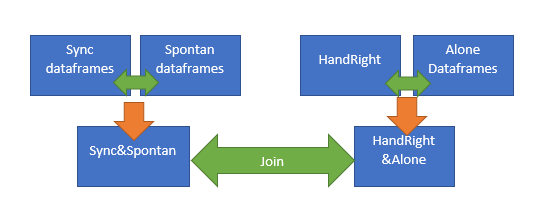

# Merge all Alone DF

In [24]:
#Merge all Alone dataframes train into one, with concat method as we learned previous semester

dfAloneTrain = pd.concat(AloneTrain)
dfAloneTrain=dfAloneTrain.reset_index()
dfAloneTrain.drop(['index'],axis='columns', inplace=True)

#Now the test set
dfAloneTest = pd.concat(AloneTest)
dfAloneTest=dfAloneTest.reset_index()
dfAloneTest.drop(['index'],axis='columns', inplace=True)


In [25]:
#I will define the whole column 'HandPosition_Label' as 0 (alone position)         
dfAloneTrain['HandPosition_Label']=0
#Also for test set
dfAloneTest['HandPosition_Label']=0

# Merge Alone df with Hand Right dfHHHHHH wrote below

First, let's check the size of dfAlone and HandRight

In [26]:
print(HandRight.shape)
print(dfAloneTrain.shape)
print("As It is possible to see, after each row of left hand in dfAlone, we should put right hand from HandRight df.")
print("Therefore, we need to add more",len(dfAloneTrain.index)-len(HandRight.index), "rows to HandRight df ")

(3893, 22)
(37812, 23)
As It is possible to see, after each row of left hand in dfAlone, we should put right hand from HandRight df.
Therefore, we need to add more 33919 rows to HandRight df 


## Turn both dataframes to the same size

In [27]:
#I will choose randomly more len(dfAloneTrain.index)-len(HandRight.index) - Allow a random selection of the same row more than once (by setting replace=True):

dfAddHandRight = HandRight.sample(n=len(dfAloneTrain.index)-len(HandRight.index) ,replace=True)

#and merge it with the HandRight df that already exist

framesHandToAdd=[HandRight,dfAddHandRight]

dfHandRight1 = pd.concat(framesHandToAdd)
dfHandRight1=dfHandRight1.reset_index()
dfHandRight1.drop(['index'],axis='columns', inplace=True)
HandRight=dfHandRight1
HandRight
#I will define the whole column 'HandPosition_Label' as 0 (alone position)         
HandRight['HandPosition_Label']=0

In [28]:
print(HandRight.shape)
print(dfAloneTrain.shape)
print("Now both df have the same size")

(37812, 23)
(37812, 23)
Now both df have the same size


## Merge both dataframes
It is possible to see that the lenght of both df is equal , therefore I will merge them so that after each row from dfAlone,<br>
There will be a row from HandRight df.

In [29]:
#Create new empty df with the names of the columns

dfAloneAndRight=pd.DataFrame(columns=HandRight.columns)
dfAloneAndRight

,Time,FrameID,HandType,Numhands,PositionX,PositionY,PositionZ,VelocityX,VelocityY,VelocityZ,...,WristPosX,WristPosY,WristPosZ,ElbowposX,ElbowPosY,ElbowPosZ,GrabStrenth,GrabAngle,PinchStrength,HandPosition_Label


In [30]:
i=0
while i<37812:
    dfAloneAndRight=dfAloneAndRight.append(dfAloneTrain.loc[[i]])
    dfAloneAndRight=dfAloneAndRight.append(HandRight.loc[[i]])
    i=i+1
dfAloneAndRight

,Time,FrameID,HandType,Numhands,PositionX,PositionY,PositionZ,VelocityX,VelocityY,VelocityZ,...,WristPosX,WristPosY,WristPosZ,ElbowposX,ElbowPosY,ElbowPosZ,GrabStrenth,GrabAngle,PinchStrength,HandPosition_Label
0,518.8087,149620,left,1,-97.601600,164.1213,42.812550,104.258900,-491.673000,-55.427550,...,-166.720700,164.83200,27.58547,-378.1662,65.89330,-69.90282,0.000000,0.741855,0.000000,0
0,7.0141,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.346600,-57.681530,...,75.457400,206.05210,45.38764,284.3946,140.01670,201.93180,0.000000,0.561324,0.000000,0
1,518.8252,149622,left,1,-95.780620,157.6353,42.180840,148.968300,-351.738600,-36.324220,...,-165.490700,155.64190,29.71037,-380.3233,52.92441,-55.71872,0.000000,0.827916,0.000000,0
1,7.0311,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.837400,-77.185150,...,74.461410,202.45620,44.28679,282.6278,140.97120,203.67730,0.000000,0.626321,0.000000,0
2,518.8418,149623,left,1,-94.393600,154.6338,41.931710,161.695800,-349.911700,-29.042770,...,-164.365800,151.57010,31.05059,-381.7444,48.55032,-47.27909,0.000000,0.920401,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37809,41.5190,20265,right,1,-21.668520,277.4948,53.575950,-18.717190,-43.595140,-627.526700,...,-2.595561,209.79520,84.80747,122.3649,36.17240,254.23590,0.000000,0.179599,0.000000,0
37810,764.5587,59989,left,1,-125.135200,215.6353,23.802480,25.567410,-5.648659,21.284490,...,-143.848200,148.10240,46.72861,-248.2768,-84.26936,103.46830,0.097735,1.988376,0.000000,0
37810,40.8366,20186,right,1,6.290743,142.2433,-12.714530,9.804001,-262.811800,290.923900,...,23.902610,85.71391,36.26043,96.1618,-33.74253,270.72740,0.000000,0.134170,0.000000,0
37811,764.5913,59991,left,1,-123.998100,215.1558,24.269450,30.369090,-15.233250,6.734551,...,-142.683900,147.47030,46.75579,-247.4121,-84.85361,103.13800,0.065015,1.989704,0.016533,0


In [31]:
#instead of run this cell every time, I will save it as csv file
dfAloneAndRight.to_csv(r'C:\Users\yuval\Datasets\HandsPositions\dfAloneAndRight.csv')


In [32]:
#import again the csv file
dfAloneAndRight = pd.read_csv(r"C:\Users\yuval\Datasets\HandsPositions\dfAloneAndRight.csv")
dfAloneAndRight

,Unnamed: 0,Time,FrameID,HandType,Numhands,PositionX,PositionY,PositionZ,VelocityX,VelocityY,...,WristPosX,WristPosY,WristPosZ,ElbowposX,ElbowPosY,ElbowPosZ,GrabStrenth,GrabAngle,PinchStrength,HandPosition_Label
0,0,518.8087,149620,left,1,-97.601600,164.1213,42.812550,104.258900,-491.673000,...,-166.720700,164.83200,27.58547,-378.1662,65.89330,-69.90282,0.000000,0.741855,0.000000,0
1,0,7.0141,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.346600,...,75.457400,206.05210,45.38764,284.3946,140.01670,201.93180,0.000000,0.561324,0.000000,0
2,1,518.8252,149622,left,1,-95.780620,157.6353,42.180840,148.968300,-351.738600,...,-165.490700,155.64190,29.71037,-380.3233,52.92441,-55.71872,0.000000,0.827916,0.000000,0
3,1,7.0311,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.837400,...,74.461410,202.45620,44.28679,282.6278,140.97120,203.67730,0.000000,0.626321,0.000000,0
4,2,518.8418,149623,left,1,-94.393600,154.6338,41.931710,161.695800,-349.911700,...,-164.365800,151.57010,31.05059,-381.7444,48.55032,-47.27909,0.000000,0.920401,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75619,37809,41.5190,20265,right,1,-21.668520,277.4948,53.575950,-18.717190,-43.595140,...,-2.595561,209.79520,84.80747,122.3649,36.17240,254.23590,0.000000,0.179599,0.000000,0
75620,37810,764.5587,59989,left,1,-125.135200,215.6353,23.802480,25.567410,-5.648659,...,-143.848200,148.10240,46.72861,-248.2768,-84.26936,103.46830,0.097735,1.988376,0.000000,0
75621,37810,40.8366,20186,right,1,6.290743,142.2433,-12.714530,9.804001,-262.811800,...,23.902610,85.71391,36.26043,96.1618,-33.74253,270.72740,0.000000,0.134170,0.000000,0
75622,37811,764.5913,59991,left,1,-123.998100,215.1558,24.269450,30.369090,-15.233250,...,-142.683900,147.47030,46.75579,-247.4121,-84.85361,103.13800,0.065015,1.989704,0.016533,0


In [33]:
dfAloneAndRight=dfAloneAndRight.drop(['Unnamed: 0'], axis=1)

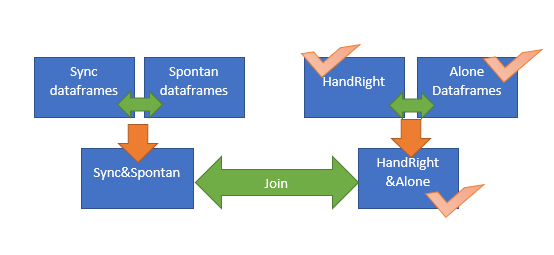

# Merge all Sync dataframes
First of all, let's check the size of all the sycc dataframes:

In [34]:
#first, let's check if all sizes of sync df are even numbers 
#(because it should be pairs of left and right by the same value of frame ID)
for element in range(len(SyncTrain)):
    temp=SyncTrain[element]
    print("The shape is", temp.shape)


The shape is (9052, 22)
The shape is (9054, 22)
The shape is (9024, 22)
The shape is (9042, 22)
The shape is (7898, 22)
The shape is (9038, 22)
The shape is (9054, 22)
The shape is (8604, 22)
The shape is (4500, 22)


In [35]:
# For train set:
dfSyncTrain= pd.concat(SyncTrain)
dfSyncTrain=dfSyncTrain.reset_index()
dfSyncTrain.drop(['index'],axis='columns', inplace=True)
#I will define the whole column 'HandPosition_Label' as 1 (Sync position)         
dfSyncTrain['HandPosition_Label']=1

#For test set
dfSyncTest= pd.concat(SyncTest)
dfSyncTest=dfSyncTest.reset_index()
dfSyncTest.drop(['index'],axis='columns', inplace=True)
#I will define the whole column 'HandPosition_Label' as 1 (Sync position)         
dfSyncTest['HandPosition_Label']=1

print(dfSyncTrain.shape)
print(dfSyncTest.shape)

(75266, 23)
(22020, 23)


# Merge all Spontan dataframes

In [36]:
#first, let's check if all sizes of sync df are even numbers 
#(because it should be pairs of left and right by the same value of frame ID)
for element in range(len(SpontanTrain)):
    temp=SpontanTrain[element]
    print("The shape is", temp.shape)

The shape is (9054, 22)
The shape is (8942, 22)
The shape is (9046, 22)
The shape is (8804, 22)
The shape is (8594, 22)
The shape is (9054, 22)
The shape is (9054, 22)
The shape is (8492, 22)
The shape is (4250, 22)


In [37]:
# For train set:
dfSpontanTrain= pd.concat(SpontanTrain)
dfSpontanTrain=dfSpontanTrain.reset_index()
dfSpontanTrain.drop(['index'],axis='columns', inplace=True)
#I will define the whole column 'HandPosition_Label' as 0 (Sync position)         
dfSpontanTrain['HandPosition_Label']=2

#For test set
dfSpontanTest= pd.concat(SpontanTest)
dfSpontanTest=dfSpontanTest.reset_index()
dfSpontanTest.drop(['index'],axis='columns', inplace=True)
#I will define the whole column 'HandPosition_Label' as 0 (Sync position)         
dfSpontanTest['HandPosition_Label']=2

print(dfSpontanTrain.shape)
print(dfSpontanTest.shape)

(75290, 23)
(22306, 23)


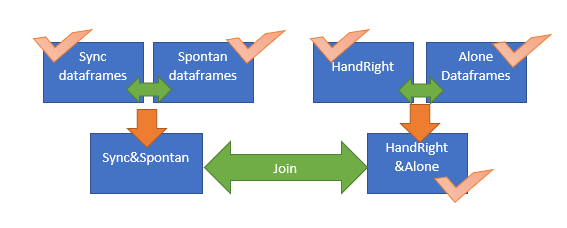

# Merge all Sync&Spontan dataframes

In [38]:
#Merge all Sync and Spontan dataframes into one, with concat method as we learned previous semester

frames = [dfSpontanTrain,dfSyncTrain]

dfSync_Spontan = pd.concat(frames)
dfSync_Spontan=dfSync_Spontan.reset_index()
dfSync_Spontan.drop(['index'],axis='columns', inplace=True)
dfSync_Spontan

,Time,FrameID,HandType,Numhands,PositionX,PositionY,PositionZ,VelocityX,VelocityY,VelocityZ,...,WristPosX,WristPosY,WristPosZ,ElbowposX,ElbowPosY,ElbowPosZ,GrabStrenth,GrabAngle,PinchStrength,HandPosition_Label
0,335.9984,128556,right,2,128.63570,224.0294,-12.295880,-18.26243,-140.54450,-117.57790,...,177.5125,173.5658,-14.569630,276.8753,-33.68264,91.61740,0.0,1.250576,0.0,2
1,335.9984,128556,left,2,-93.24845,143.9423,-37.815970,-109.09820,240.38980,-67.62959,...,-147.0455,109.9380,-5.326688,-329.8577,-34.41571,93.88171,0.0,0.014736,0.0,2
2,336.0150,128558,right,2,129.15550,221.9923,-15.001810,47.36464,-64.25022,-168.85850,...,177.7894,171.1952,-14.677850,276.0645,-33.15913,97.88171,0.0,1.069930,0.0,2
3,336.0150,128558,left,2,-94.86554,148.5542,-39.001580,-80.99012,278.60220,-66.79356,...,-148.2022,113.0909,-7.375025,-326.9279,-39.97873,85.98000,0.0,0.000000,0.0,2
4,336.0315,128560,right,2,129.87070,220.7944,-18.386810,35.05422,-84.74242,-205.72030,...,178.3730,169.9159,-15.246240,276.1767,-30.72506,104.13920,0.0,0.916969,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150551,856.2631,67309,right,2,101.91230,212.0264,42.535680,79.95810,113.41030,190.77140,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,1
150552,856.2958,67311,left,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,-109.7250,130.7078,34.033600,-295.5957,-14.97817,140.02630,0.0,0.000000,0.0,1
150553,856.2958,67311,right,2,103.84750,214.7484,47.070820,61.11773,95.13531,155.74530,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,1
150554,856.3295,67314,left,2,-84.05124,187.8450,-5.172269,-57.17249,109.20360,58.48146,...,-109.5167,131.6489,33.329450,-282.9649,-31.35462,135.07610,0.0,0.000000,0.0,1


In [39]:
#After all data cleaning, let's export the dataframes:
#dfAloneAndRight.to_csv(r'C:\Users\yuval\Datasets\HandsPositions\dfAloneAndRight.csv')
dfSync_Spontan.to_csv(r'C:\Users\yuval\Datasets\HandsPositions\dfSync_Spontan.csv')


#Test set
dfSpontanTest.to_csv(r'C:\Users\yuval\Datasets\HandsPositions\dfSpontanTest.csv')
dfSyncTest.to_csv(r'C:\Users\yuval\Datasets\HandsPositions\dfSyncTest.csv')
dfAloneTest.to_csv(r'C:\Users\yuval\Datasets\HandsPositions\dfAloneTest.csv')


In [40]:
#import again the csv file
dfAloneAndRight = pd.read_csv(r"C:\Users\yuval\Datasets\HandsPositions\dfAloneAndRight.csv")
dfSync_Spontan = pd.read_csv(r"C:\Users\yuval\Datasets\HandsPositions\dfSync_Spontan.csv")

dfSpontanTest = pd.read_csv(r"C:\Users\yuval\Datasets\HandsPositions\dfSpontanTest.csv")
dfSyncTest = pd.read_csv(r"C:\Users\yuval\Datasets\HandsPositions\dfSyncTest.csv")
dfAloneTest = pd.read_csv(r"C:\Users\yuval\Datasets\HandsPositions\dfAloneTest.csv")


In [41]:
dfAloneAndRight=dfAloneAndRight.drop(['Unnamed: 0'], axis=1)
dfSync_Spontan=dfSync_Spontan.drop(['Unnamed: 0'], axis=1)
dfSpontanTest=dfSpontanTest.drop(['Unnamed: 0'], axis=1)
dfSyncTest=dfSyncTest.drop(['Unnamed: 0'], axis=1)
dfAloneTest=dfAloneTest.drop(['Unnamed: 0'], axis=1)

## Merge dfAloneAndRight and dfSync_Spontan
Now After I have 2 dataframe dfAloneAndRight and dfSync_Spontan- let's merge them both into one general df

In [42]:
print(dfAloneAndRight.shape)
print(dfSync_Spontan.shape)


(75624, 23)
(150556, 23)


In [43]:
#Merge all Alone dataframes into one, with concat method as we learned previous semester
#After this cell I will have one big unite df of all train set
frames_LeftAndRight=[dfAloneAndRight,dfSync_Spontan]
dfGeneral = pd.concat(frames_LeftAndRight)
dfGeneral=dfGeneral.reset_index()
dfGeneral.drop(['index'],axis='columns', inplace=True)
dfGeneral

,Time,FrameID,HandType,Numhands,PositionX,PositionY,PositionZ,VelocityX,VelocityY,VelocityZ,...,WristPosX,WristPosY,WristPosZ,ElbowposX,ElbowPosY,ElbowPosZ,GrabStrenth,GrabAngle,PinchStrength,HandPosition_Label
0,518.8087,149620,left,1,-97.60160,164.1213,42.812550,104.25890,-491.67300,-55.42755,...,-166.72070,164.8320,27.58547,-378.1662,65.89330,-69.90282,0.0,0.741855,0.0,0
1,7.0141,16287,right,1,11.93032,199.9861,4.981665,-35.51221,-165.34660,-57.68153,...,75.45740,206.0521,45.38764,284.3946,140.01670,201.93180,0.0,0.561324,0.0,0
2,518.8252,149622,left,1,-95.78062,157.6353,42.180840,148.96830,-351.73860,-36.32422,...,-165.49070,155.6419,29.71037,-380.3233,52.92441,-55.71872,0.0,0.827916,0.0,0
3,7.0311,16289,right,1,11.19190,195.3075,3.661716,-43.58744,-309.83740,-77.18515,...,74.46141,202.4562,44.28679,282.6278,140.97120,203.67730,0.0,0.626321,0.0,0
4,518.8418,149623,left,1,-94.39360,154.6338,41.931710,161.69580,-349.91170,-29.04277,...,-164.36580,151.5701,31.05059,-381.7444,48.55032,-47.27909,0.0,0.920401,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226175,856.2631,67309,right,2,101.91230,212.0264,42.535680,79.95810,113.41030,190.77140,...,131.85900,149.6264,66.09853,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,1
226176,856.2958,67311,left,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,-109.72500,130.7078,34.03360,-295.5957,-14.97817,140.02630,0.0,0.000000,0.0,1
226177,856.2958,67311,right,2,103.84750,214.7484,47.070820,61.11773,95.13531,155.74530,...,134.04160,151.5924,68.17693,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,1
226178,856.3295,67314,left,2,-84.05124,187.8450,-5.172269,-57.17249,109.20360,58.48146,...,-109.51670,131.6489,33.32945,-282.9649,-31.35462,135.07610,0.0,0.000000,0.0,1


In [44]:
#instead of run this cell every time, I will save it as csv file
dfGeneral.to_csv(r'C:\Users\yuval\Datasets\HandsPositions\dfGeneral.csv')


In [45]:
#import again the csv file
dfGeneral = pd.read_csv(r"C:\Users\yuval\Datasets\HandsPositions\dfGeneral.csv")
dfGeneral

,Unnamed: 0,Time,FrameID,HandType,Numhands,PositionX,PositionY,PositionZ,VelocityX,VelocityY,...,WristPosX,WristPosY,WristPosZ,ElbowposX,ElbowPosY,ElbowPosZ,GrabStrenth,GrabAngle,PinchStrength,HandPosition_Label
0,0,518.8087,149620,left,1,-97.60160,164.1213,42.812550,104.25890,-491.67300,...,-166.72070,164.8320,27.58547,-378.1662,65.89330,-69.90282,0.0,0.741855,0.0,0
1,1,7.0141,16287,right,1,11.93032,199.9861,4.981665,-35.51221,-165.34660,...,75.45740,206.0521,45.38764,284.3946,140.01670,201.93180,0.0,0.561324,0.0,0
2,2,518.8252,149622,left,1,-95.78062,157.6353,42.180840,148.96830,-351.73860,...,-165.49070,155.6419,29.71037,-380.3233,52.92441,-55.71872,0.0,0.827916,0.0,0
3,3,7.0311,16289,right,1,11.19190,195.3075,3.661716,-43.58744,-309.83740,...,74.46141,202.4562,44.28679,282.6278,140.97120,203.67730,0.0,0.626321,0.0,0
4,4,518.8418,149623,left,1,-94.39360,154.6338,41.931710,161.69580,-349.91170,...,-164.36580,151.5701,31.05059,-381.7444,48.55032,-47.27909,0.0,0.920401,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226175,226175,856.2631,67309,right,2,101.91230,212.0264,42.535680,79.95810,113.41030,...,131.85900,149.6264,66.09853,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,1
226176,226176,856.2958,67311,left,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,...,-109.72500,130.7078,34.03360,-295.5957,-14.97817,140.02630,0.0,0.000000,0.0,1
226177,226177,856.2958,67311,right,2,103.84750,214.7484,47.070820,61.11773,95.13531,...,134.04160,151.5924,68.17693,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,1
226178,226178,856.3295,67314,left,2,-84.05124,187.8450,-5.172269,-57.17249,109.20360,...,-109.51670,131.6489,33.32945,-282.9649,-31.35462,135.07610,0.0,0.000000,0.0,1


In [46]:
dfGeneral=dfGeneral.drop(['Unnamed: 0'], axis=1)

## Consolidation of two records left&right 
As it already explained in class, each 2 rows of left&right hand is actually one frame, therefore I will turn each 2 rows into one.

In [47]:
print('h')1

SyntaxError: invalid syntax (<ipython-input-47-ba931a1f464e>, line 1)

In [ ]:
#function to combine 2 consecutive rows

liR = ["{}{}".format(ind,'Right') for ind in dfGeneral.columns] #appending "right" to the end of each column name
liL = ["{}{}".format(ind,'Left') for ind in dfGeneral.columns]
LiTotal = liR + liL

flattenedDf = pd.DataFrame(columns = LiTotal) #empty df
    
for i in range(0, len(dfGeneral), 2): #Iterating over every record in the dataframe with jumps of 2 (due to
    #every iteration using 2 consecutive rows for merging)
    if (dfGeneral.loc[i]['HandType'] == 'right'):
        right = i
        left = i+1
    else:
        left = i
        right = i+1
    
    rightList = dfGeneral.loc[right]
    rightList.index = liR
        
    leftList = dfGeneral.loc[left]
    leftList.index = liL
    
    completeRecord = pd.concat([rightList, leftList])
    flattenedDf = flattenedDf.append(completeRecord, ignore_index = True)
dfGeneral = flattenedDf 

In [ ]:
#instead of run this cell every time, I will save it as csv file
#dfGeneral.to_csv(r'C:\Users\yuval\Datasets\HandsPositions\dfGeneral.csv')


In [ ]:
#import again the csv file
FinalDfHands = pd.read_csv(r"C:\Users\yuval\Datasets\HandsPositions\FinalDfHands.csv")
FinalDfHands

In [ ]:
FinalDfHands=FinalDfHands.drop(['Unnamed: 0'], axis=1)
FinalDfHands

# Big and Final df
## <b>know and organize the dataset</b>

In [ ]:
# check the shape of the DataFrame (rows, columns)
FinalDfHands.shape 

**Explanation about the columns and rows:**<br>

**What are the features?**<br>
99646 rows- every row represent one frame of left and right hand.<br>

46 columns of features-23 features to left hand and 23 features to right hand.<br>

**What is the response?**<br>
label-What hand position was every frame of left and right hand- 0 (Sync), 1 (Spontan), 2 (Alone) .<br>

In [ ]:
#I want to check what the range of each column:
#by running both commands:
FinalDfHands.max(axis = 0) 
FinalDfHands.min(axis = 0) 
#Also can see it by use:
FinalDfHands.describe()

In [ ]:
#We'll run the info() command to get a quick description of the data,particulary reguarding the total number of rows, 
#each attribute’s type, and the number of nonnull values.
FinalDfHands.info()

In [ ]:
# Histogram of all numeric features
FinalDfHands.hist(bins=50, figsize=(20,15))
plt.show()

**conclusions from the histograms:**<br>HHHHHHHHHHHH
1.Most of the frames were taken when the distance between the elbows on the Y axis (Elbow Pos YRight/Left) rotated around the 0. <br>
2.Most of the frames were taken when the Pitch (Left and Right) is between 0 to 2.

1.beer_abv- most of the beers are less than 10% abv<br>
2.beer_beerid,brewery_id-the lower ID's have the larger nambers of reviews than the higher ID's<br>
3.review_appearance-most of the beers have been rates by 4<br>
4.review_aroma- most of the beers have been rated as 4<br>
5.review_overall-most of the beers have been rated as 4<br>
6.review_palate-most of the beers have been rated as 4<br>
7.review_taste-most of the beers have been rated as 4<br>



### Define Unite Label

I would like to check if the HandPosition_LabelLeft and HandPosition_LabelRight have the same values , <br>
so that I could delete one of them and leave one column of label.


In [ ]:
FinalDfHands['HandPosition_LabelLeft'].equals(FinalDfHands['HandPosition_LabelRight'])

In [ ]:
#Both columns are equal, therefore I will delete one of them , and change the name of the other to general label
FinalDfHands=FinalDfHands.drop('HandPosition_LabelLeft',axis=1)


In [ ]:
#check the shape of the df
FinalDfHands.shape

In [ ]:
#change the name of the column :HandPosition_LabelRight
FinalDfHands = FinalDfHands.rename(columns={'HandPosition_LabelRight': 'Label'})

### Delete Irrelevant Columns

The  columns: Frame IDRight, Frame IDLeft are not columns that we want to affect on our models, because they containing irrelevant data.Therefore, I will delete them.

In [ ]:
FinalDfHands=FinalDfHands.drop([' Frame IDLeft',' Frame IDRight'],axis=1)
#check the shape of the df
FinalDfHands.shape

So that the columns: ' # handsLeft',' # handsRight'- It is not interesting the number of hands that appear in the same frame,<br>
    and we can even say that we do not want this value to appear in df because it can has directly affect on the models predictions.

In [ ]:
FinalDfHands=FinalDfHands.drop(['Num_handsLeft','Num_handsRight'],axis=1)
#check the shape of the df
FinalDfHands.shape

More 2 columns I would like to treat them are:  ' Hand TypeRight',' Hand TypeLeft'.<br>
Those columns irrelevant in the df because the value of the columns are the same in each rows. 
Therefore, I will delete them:

In [ ]:
FinalDfHands=FinalDfHands.drop(['HandTypeRight','HandTypeLeft'],axis=1)
#check the shape of the df
FinalDfHands.shape

More 2 columns I would like to delete are 'TimeRight','TimeLeft'- because after I deleted the first seven seconds ,<br>
and see that It is around 60 frames in 1 second- there is no need anymore in those columns.<br>
Let's delete them:

In [ ]:
FinalDfHands=FinalDfHands.drop(['TimeRight','TimeLeft'],axis=1)
#check the shape of the df
FinalDfHands.shape

### Plot the distribution of the data

In [ ]:
FinalDfHands['Label'].value_counts().plot.bar()
plt.title('Distribution of the data')
plt.xlabel('Label')
plt.ylabel('Number of frames')
plt.show()

**Conclusion**<br>
We have balanced data

# Check if there are more equal columns

(accept the label we already unite)


In [ ]:
#create a list of all the columns name:
ColList=FinalDfHands.columns
ColList

In [ ]:
deletedCol=[]
for ColName1 in ColList:
    for ColName2 in ColList:
        if (ColName1!= ColName2):
            if(FinalDfHands[ColName1].equals(FinalDfHands[ColName2])==True):#Both columns are equal
                FinalDfHands=FinalDfHands.drop(ColName1,axis=1)#drop one of them
                deletedCol.append(ColName1)#and add It to array, so we know which columns we remove.



In [ ]:
FinalDfHands.shape

**Conclusion**<br>
There are no more equal columns.

## Nan Values & Duplications
Already dropped the Nan Values and Duplications in the start of this notebook.

# Correlations

In [ ]:
#we will compute standard correlation coefficient between every pair of attributes, using the corr() method:
Correlation=FinalDfHands.corr()
Correlation
#show correlation as heat map
plt.figure(figsize=(15,15))#set size
sns.heatmap(Correlation, annot=True,cmap="BuPu", fmt=".2f")
plt.title ('Correlation')
plt.show()

**Conclusion**HHHHHHHHHHHH

### Drop additional unrelevant features
As we can see from the correlation graph, HHHHHHHHHHH

In [ ]:
FinalDfHands = FinalDfHands.drop(['#handsRight', '#handsLeft', 'TimeRight', 'TimeLeft', 'FrameIDRight', 'FrameIDLeft',
                        'HandTypeRight', 'HandTypeLeft', 'labelRight'], axis = 1) #Further unneeded attributes

### Take every fifth row
As we talked in class, we need to take every fifth row, so that It will be possible to see real and meaningful changes.

In [ ]:
#every 5th row
FinalDfHands = FinalDfHands.iloc[::5, :]

FinalDfHands = FinalDfHands.reset_index() #resetting index of the handRight for merging
FinalDfHands = FinalDfHands.drop(['index'], axis = 1)

# Split to train set and test set

In [ ]:
#split the data into labels and features 
y=dfGeneral.label #label is the label we want to predict
x=dfGeneral.drop('label',axis=1)#use drop function to take all other data in x

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 0)#we will tale 20% of the dataset to testing and the rest for training


# <b>Dimensionality Reduction </b>

# PCA -Principal Component Analysis

PCA is the most popular dimensionality reduction algorithm.<br>
First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.<br>

# Data Scaling 

By using PCA I will try to reduce those dimensions into smaller number of dimensions, which will be creating a new vector space. <br>
First thing I want to do is **Min-Max scaling**.<br>
Min-max scaling (normalization) is way to get all attributes to have the same scale values, by the way they are shifted and rescaled so that they end up ranging from 0 to 1.<br>
We do this by subtracting the min value and dividing by the max minus the min.<br>
Scikit-Learn provides a transformer called MinMaxScaler for this.<br>
It has a feature_range hyperparameter that let change the range if, for some reason, you don’t want 0–1.<br>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#We will scale the x_train set
scaler = MinMaxScaler()
scaler.fit(x_train)#this is the train part from the secondary split

scaled_data=scaler.transform(x_train)# We get array 
x_train_scaled= pd.DataFrame(scaled_data)#turn into df
x_train_scaled

In [ ]:
#We will scale the x_test set
scaled_data_test=scaler.transform(x_test)# We get array 
x_test_scaled= pd.DataFrame(scaled_data_test)#turn into df
x_test_scaled

We can see the data has been converted into new dataframe , and this is based on the standard deviation as 1, and mean is equal to 0. <br>
Now we will apply the PCA.<br>

In [ ]:
x_train_scaled.shape

# Back to PCA

## Importing additional libraries


In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing #this package gives us functions for scaling the data before performing PCA


Before I will do the PCA, Iwant to see again the data: 

In [ ]:
x_train_scaled.tail (10)

In [ ]:
print("Data has",len(x_train_scaled.columns),"features." ) 

In [ ]:
#From the total dimensions, I want to set n_components to be a float between 0.0 and 1.0, 
#indicating the ratio of variance I wish to preserve, in this case I will choose 0.95:
 
pca = PCA(n_components = 0.95)

#fit the scaled data
X_train_Reduced=pca.fit_transform(x_train_scaled)

#transform the PCA by using the PCA object for the scaled data
X_test_Reduced=pca.transform(x_test_scaled)


In [ ]:
#We get an array
X_train_Reduced
#So we will turn it into df
X_train_Reduced = pd.DataFrame(X_train_Reduced)
#and check the shape of it to see how it change
X_train_Reduced.shape

It is possible to see the difference by the number of columns- 8100 columns to x_train_scaled, and different number after the PCA.HHHHHHHHHHHHHHHHHHHHHH

In [ ]:
print ('\033[1m' , 'Conclusion' , '\033[0m')HHHHHHHHHHHHHHHHHHHHHHHHH
print("After the PCA , dimensions dropped from 8100 to", len(X_train_Reduced.columns),".")
print("Means that dimensions decreased by", 100-((len(X_train_Reduced.columns)*100)/8100), "%")



# <b> Ensemble Learning<b>
Building a model on top of many other models is called Ensemble Learning.<br>
More extensively, if you aggregate the predictions of a group of predictors (such as classifiers in current project), you will
often get better predictions than with the best individual predictor.<br>
In this part of the project I will try to improve my previous project results by using Ensemble Learning. <br>
    
While finding the model with the best accuracy, I would like to check what model is with the best run time.<br>


In [ ]:
#Therefore , to find the best run time, I need to import the time library.
import time

#Initialize an empty array of model's running times
RunningTimes=[]

#Initialize an empty array of model's names
ModelName=[]

#Initialize an empty array of model's accuracies
Accuracies=[]

First of all, I will show the model 'Random Forest'.<br>

# <b> Random Forest<b>
    
Random Forest is the Ensemble Learning of Decision Trees.<br>                                                             Random Forests as we learned, is a supervised learning algorithm.<br>                                                           There is a direct relationship between the number of trees in the forest and the results it can get. It uses a number of decision trees and predicts the more accurate result by voting in case of classification (or averaging in case of regression).<br>
    
         
## Explain about method's parameters<b>
**n_estimators** -  The number of trees in the forest,the more estimators you give it, the better it will do.<br>
From what I have been reading, 500 or 1000 is usually sufficient.<br>
**n_jobs** -  the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores).<br>
**random_state**- is be used to set the internal parameters initially, so you can repeat the training deterministically.<br>
    
## Importing additional libraries

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Fit & Predict

In [ ]:
#Start measuring running time
StartTimeRF = time.time()

# instantiate the model
RForest= RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

# fit the model with data
RForest.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
RForestPred = RForest.predict(X_test_Reduced)

#Finish measuring running time
EndTimeRF = time.time()

#Toal running time
TotalTimeRF= EndTimeRF - StartTimeRF

#Add model's running time to RunningTimes array, and name to ModelName array
RunningTimes.append(TotalTimeRF)
ModelName.append('RF')


**Accuracy,Classification Error (Misclassification Rate) :** Overall, how often is the classifier incorrect?<br>

In [ ]:
accuracyRForest = metrics.accuracy_score(y_test, RForestPred)#check the predictions with the real values

print("The Accuracy of this model, after PCA is:",accuracyRForest)
print("the Classification Error for this model, after PCA is:", 1 - accuracyRForest)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyRForest)

print(ModelName)
print(Accuracies)

## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Random Forest classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [ ]:
from sklearn.metrics import confusion_matrix
CM_RF=confusion_matrix(y_test,RForestPred)
CM_RF#It's a 10x10 matrix because there are 10 response classes (0-9)HHHHHHHHHHHHHHHHHHHHHHHH

Lets show Confusion Matrix as heat map:

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_RF,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Random Forest Confusion Matrix')
plt.show()

**Conclusion**<br>
The main left diagonal represent all the cases that the model predict correctly (TN,TP).<br>
The rest cells represent all the cases the model predict incorrectly (FP,FN).<br>

Therefore, It can be concluded that the least good predicted label with Random Forest model is 'Shirt'(label number 6),<br>
and the most good predicted label is 'Trouser'(label number 1).<br>

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:


In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test,RForestPred))

**Conclusion**<br>HHHHHHHHHHHHHHHHHHHHHHH

As we learned, **Precision** answer the question- What proportion of positive identifications was actually correct,<br>
and equal to:<br>
    $Precision=\frac {TP }{TP+FP}$ <br>
    
**Recall**, answer the question- What proportion of actual positives was identified correctly,<br>
and equal to:<br>
 $Recall=\frac {TP }{TP+FN}$ <br>

**F1 score** is defined as the harmonic mean between precision and recall, and It formula is:<br>
In cats:   $F1 score=2 \times \frac{Precision \times Recall}{Precision+ Recall}$<br>

Therefore , it can be concluded that label number __________ has the least FP,<br>
and label number ___________ has the most FP.<br>

# Boosting

Boosting refers to a family of algorithms that are able to convert weak learners to strong learners.<br>
The predictions are then combined through a weighted majority vote in case of classification (or a weighted sum in case of regression) to produce the final prediction.<br>
The models I will show are: AdaBoost, Gradient Boosting (XGBoost).<br>

# <b> AdaBoost <b>
    
AdaBoost is the seconed model I will train.<br>
This model gives more attention to the training instances that the predecessor underfitted.<br>
This results in new predictors focusing more and more on the hard cases.<br>

## Explain about method's parameters<b>
**n_estimators**- Number of weak learners to train iteratively.<br>
**learning_rate**- Shrinks the contribution of each classifier. It uses 1 as a default value.<br>
    There is a trade-off between n_estimators to learning_rate. <br>
    
## Importing additional libraries

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## Fit & Predict


In [ ]:
#Start measuring running time
StartTimeADA = time.time()

# instantiate the model
DecisionTreeClf = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(DecisionTreeClf, n_estimators=100, learning_rate=0.5)

# fit the model with data
ada_clf.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
ada_clfPred = ada_clf.predict(X_test_Reduced)

#Finish measuring running time
EndTimeADA = time.time()

#Toal running time
TotalTimeADA = EndTimeADA - StartTimeADA

#Add model's running time to RunningTimes array, and name to ModelName array
RunningTimes.append(TotalTimeADA)
ModelName.append('ADA')

**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyAda = metrics.accuracy_score(y_test, ada_clfPred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyAda)
print("the Classification Error for this model is:", 1 - accuracyAda)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyAda)

print(ModelName)
print(Accuracies)

## Model evaluation metrics for classification

### Confusion Matrix

In [ ]:
CM_ADA=confusion_matrix(y_test,ada_clfPred)
#Show It as a heat map
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_ADA,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('ADA Boost Confusion Matrix')
plt.show()

**Conclusion**<br>HHHHHHHHHHHHHHHHHHH
It can be concluded that the least good predicted label with Ada Boost model is 'Shirt'(label number 6),<br>
and the most good predicted label is 'Bag'(label number 8).<br>

### Classification Report


In [ ]:
print (classification_report(y_test,ada_clfPred))

**Conclusion**<br>HHHHHHHHHHHHHHHHHHHHH
As you already see, I have written below the formulas of precision, recall and F1-Score.<br>
Therefore , it can be concluded that label number 9 has the least FP,<br>
and label number 6 has the most FP.<br>

# Gradient Boosting

Just like AdaBoost,Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor.<br>
However, instead of tweaking the instance weights at every iteration like AdaBoost does, <br>
this method tries to fit the new predictor to the residual errors made by the previous predictor.

# <b> XGBoost  <b>
    
XGBoost is the third model I will train.<br>
XGBoost is an optimized implementation of Gradient Boosting , which stands for Extreme Gradient Boosting.<br>
This model have enhanced performance and speed in tree-based (sequential decision trees) machine learning algorithms.<br>
It is the most common algorithm used for applied machine learning in competitions and has gained popularity through winning solutions in structured and tabular data

## Explain about method's parameters<b>

**learning_rate**- Shrinks the contribution of each classifier. It uses 1 as a default value.<br>
There is a trade-off between n_estimators to learning_rate.<br>
**n_estimators**- Number of weak learners to train iteratively.<br>
**verbosity**- Verbosity of printing messages. Valid values of 0 (silent), 1 (warning), 2 (info), and 3 (debug).<br>
**use_label_encoder**-  Use the label encoder from scikit-learn to encode the labels. <br>
For new code, It is recommend to set this parameter to False.

## Importing additional libraries




In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import warnings

## Fit & Predict

In [ ]:
#Start measuring running time
StartTimeXG = time.time()

# instantiate the model
XGBoost = XGBClassifier(learning_rate = 0.2, n_estimators = 2000, verbosity=0,use_label_encoder=False)

# fit the model with data
XGBoost.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
XGBoost_Pred = XGBoost.predict(X_test_Reduced)

#Finish measuring running time
EndTimeXG = time.time()

#Toal running time
TotalTimeXG = EndTimeXG - StartTimeXG

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeXG)
ModelName.append('XG')

**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyXG = metrics.accuracy_score(y_test, XGBoost_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyXG)
print("the Classification Error for this model is:", 1 - accuracyXG)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyXG)

print(ModelName)
print(Accuracies)

## Model evaluation metrics for classification

### Confusion Matrix

In [ ]:
CM_XG=confusion_matrix(y_test,XGBoost_Pred)
#Let's show Confusion Matrix as heat map:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_XG,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('XG Boost Confusion Matrix')
plt.show()

**Conclusion**<br>HHHHHHHHHHHHHHHHHHHHH
It can be concluded that the least good predicted label with XGBoost model is 'Shirt'(label number 6),<br>
and the most good predicted label is 'Trouser'(label number 1 ).<br>

### Classification Report


print (classification_report(y_test,XGBoost_Pred))

**Conclusion**<br>
As you already see, I have written below the formulas of precision, recall and F1-Score.<br>
Therefore , it can be concluded that label number 1 has the least FP,<br>
and label number 6 has the most FP.<br>

# Simple Classification models<br>

Let's start implementing simple classification models we learned last semester, and then return to ensemble models.
I will explain this decision later.<br>

## <b>KNN model</b>
### <b> Which n_neighbors should I choose?<b>
    
First of all I ran for loop about different n_neighbors and checked the accuracy for eack case, <br>
then I chose the n_neighbors that gave me the most accurate value:<br>


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Please do not run this cell,It is very long time to be loaded
#i ran it in the start to see which n neighbors will be the best to choose
scores=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)

#fit the model with data
    knn.fit(X_train_Reduced, y_train)

# predict the response for new observations
    from sklearn.model_selection import cross_val_score #import cross validation method

    score=cross_val_score(knn,X_train_Reduced, y_train,cv=2).mean()
    print("Accuracy for k="+str(i)+" is "+str(score) )
    scores.append(score)
    

In [ ]:
#This is the array of all the accuracies according to different n neighbors
scores

In [ ]:
#Let's plot the relation between n and testing accuracy
n_neigh=list(range(1,20))
plt.plot(n_neigh,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999X, means- 7,5,,6,4,4,3,3,1.....
plt.show()

In [ ]:
#Let's find the max accuracy in 'score' array:
import numpy as np
max_value = np.max(scores)
max_value
#find the index of this max score
index_maxScore=scores.index(max_value)
index_maxScore
print('\033[1m' , 'Conclusion' , '\033[0m')
print('It can be concluded that the best accuracy of KNN model is:',max_value)
print("and It received when the number of neighbors is equal to:", index_maxScore+1.)


## Fit&Predict

In [ ]:
#Start measuring running time
StartTimeKNN = time.time()

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=6)#################################HHHHHHHHHH

# fit the model with data
knn.fit(X_train_Reduced, y_train)


# make predictions on the testing set (predict for first_test)
Knn_Pred=knn.predict(X_test_Reduced)

#Finish measuring running time
EndTimeKNN = time.time()

#Toal running time
TotalTimeKNN = EndTimeKNN - StartTimeKNN

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeKNN)
ModelName.append('KNN')

**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyKNN = metrics.accuracy_score(y_test, Knn_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyKNN)
print("the Classification Error for this model is:", 1 - accuracyKNN)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyKNN)

print(ModelName)
print(Accuracies)

## Model evaluation metrics for classification

### Confusion Matrix

In [ ]:
CM_KNN=confusion_matrix(y_test,Knn_Pred)
CM_KNN#It's a 3x3 matrix because there are 3 response classes (0,1,2)
#Let's show Confusion Matrix as heat map:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_KNN,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('KNN Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
print (classification_report(y_test,Knn_Pred))

**Conclusion**<br>
It can be concluded that the least good predicted label with KNN model is 'Shirt'(label number 6),<br>
and the most good predicted label is 'Trouser'(label number 1).<br>


## Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

#Start measuring running time 
StartTimeLR = time.time()

# instantiate the model (using the default parameters)
log_reg = LogisticRegression(max_iter=400)

# fit the model with data
log_reg.fit(X_train_Reduced, y_train)

#make predictions on the testing set
Log_Pred = log_reg.predict(X_test_Reduced)

#Finish measuring running time
EndTimeLR = time.time()

#Toal running time  
TotalTimeLR = EndTimeLR - StartTimeLR

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeLR)
ModelName.append('Logistic_Regression')


**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyLR = metrics.accuracy_score(y_test, Log_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyLR)
print("the Classification Error for this model is:", 1 - accuracyLR)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyLR)

print(ModelName)
print(Accuracies)

## Model evaluation metrics for classification

### Confusion Matrix

In [ ]:
CM_LR=confusion_matrix(y_test,Log_Pred)
CM_LR
#Let's show Confusion Matrix as heat map:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_LR,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Logistic Regression Confusion Matrix')
plt.show()

### Classification Report


In [ ]:
print (classification_report(y_test,Log_Pred))

**Conclusion**<br>
It can be concluded that the least good predicted label with Logistic Regression model is 'Shirt'(label number 6),<br>
and the most good predicted label is 'Trouser'(label number 1).<br>


# Subtotal Of All Models Accuracies&RunTime

In [ ]:
#Create array of all accuracies:

print(Accuracies)
print(ModelName)

#define df
data = pd.DataFrame({'Model': ModelName, 'Accuracies': list(Accuracies), 'RunTime':list(RunningTimes)}, columns=['Model', 'Accuracies', 'RunTime'])

data

# Back To Ensemble learning Models

Now, After I finished the implement of the simple classification models, I would like to continue with the Ensemble learning Models. <br>
I have preferred to implement those simple classification models before using the models: Bagging, Stacking, Voting  
because those three models may use part  (or all) those simple classification models. <br>
It explain in each model in detail later in the notebook.<br>

# <b> Bagging&Pasting  <b>
    
Bagging stands for bootstrap aggregation. One way to reduce the variance of an estimate is to average together multiple estimates. For aggregating the outputs of base learners in case of classification, bagging uses Voting (and averaging in case of regression).<br>
For example, random forest trains X Decision Tree, It is possible to train X different trees on different random subsets of the data and perform voting for final prediction.<br>
Bagging ensembles methods are Random Forest and Extra Trees.<br>
    
In other words, Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset,<br> and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
    
Bagging is composed of two parts: aggregation and bootstrapping.<br>
Bootstrapping is a sampling method, where a sample is chosen out of a set, using the replacement method. <br>
The learning algorithm is then run on the samples selected.<br>

The bootstrapping technique uses sampling with replacements to make the selection procedure completely random. <br>
When a sample is selected without replacement, the subsequent selections of variables are always dependent on the previous selections, making the criteria non-random. <br>   
    
When sampling is performed without replacement, it is called **pasting**.<br>

In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors,<br>
but only bagging allows training instances to be sampled several times for the same predictor.<br>
    
## Explain about method's parameters<b>

**base_estimator**-The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a Decision Tree Classifier.In my case, I have chosed XGBoost because It is the model with the best accuracy til now.<br>
**n_estimators**- The number of base estimators in the ensemble <br>
**bootstrap**- Whether samples are drawn with replacement (as I explained above). If False, sampling without replacement is performed.   <br>

# Bagging

## Importing additional libraries


In [ ]:
from sklearn.ensemble import BaggingClassifier

## Fit & Predict

In [ ]:
#Start measuring running time
StartTimeBagging = time.time()

# instantiate the model
Bagging = BaggingClassifier(XGBoost, n_estimators = 100, bootstrap = True)#HHHHHHHHHHHHHHHHHHHHHHHHHHI chose XGBoost because till now 'It is the mosrt accurate model 

# fit the model with data
Bagging.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Bagging_Pred = Bagging.predict(X_test_Reduced)

#Finish measuring running time
EndTimeBagging = time.time()

#Toal running time
TotalTimeBagging = EndTimeBagging - StartTimeBagging

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeBagging)
ModelName.append('Bagging')


**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyBagging = metrics.accuracy_score(y_test, Bagging_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyBagging)
print("the Classification Error for this model is:", 1 - accuracyBagging)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyBagging)

print(ModelName)
print(Accuracies)

## Model evaluation metrics for classification

### Confusion Matrix

In [ ]:
CM_BAG=confusion_matrix(y_test,Bagging_Pred)
CM_BAG
#Let's show Confusion Matrix as heat map:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_BAG,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Bagging Confusion Matrix')
plt.show()

### Classification Report


In [ ]:
print (classification_report(y_test,Bagging_Pred))

**Conclusion**<br>
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH

# Pasting

## Fit & Predict

In [ ]:
#Start measuring running time
StartTimePasting = time.time()

# instantiate the model
Pasting = BaggingClassifier(XGBoost, n_estimators = 100, bootstrap = False)

# fit the model with data
Pasting.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Pasting_Pred = Pasting.predict(X_test_Reduced)

#Finish measuring running time
EndTimePasting = time.time()

#Toal running time
TotalTimePasting = EndTimePasting - StartTimePasting

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimePasting)
ModelName.append('Pasting')


**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyPasting = metrics.accuracy_score(y_test, Pasting_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyPasting)
print("the Classification Error for this model is:", 1 - accuracyPasting)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyPasting)

## Model evaluation metrics for classification

### Confusion Matrix

In [ ]:
CM_PAS=confusion_matrix(y_test,Pasting_Pred)
CM_PAS
#Let's show Confusion Matrix as heat map:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_BAG,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Bagging Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
print (classification_report(y_test,Pasting_Pred))

**Conclusion**<br>HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH


# <b> Stacking  <b>
Instead of using trivial functions (such as hard voting) to combine the predictions of all classifiers in an ensemble,<br>
in Stacking we are training a model to perform this combination.<br>
Actually we can say we have Stack of estimators with a final classifier (The final classifier to "classify the classifiers" is chosen to be Logistic Regression).<br>
    
## Explain about method's parameters<b>

**estimators**- List of tuples. Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_.<br>
    
## Importing additional libraries


In [ ]:
from sklearn.ensemble import StackingClassifier

## Fit & PredictHHHHHHHHHHHHHHHHHHHHHHH drop the model with the lowest accuracy (see Fashion notebook

In [ ]:
#Start measuring running time
StartTimeStacking = time.time()

# instantiate the model
Stacking = StackingClassifier(estimators= [ ('rf', RForest),('logr', log_reg),('ab',ada_clf),('xb',XGBoost), ('knn', knn)])

# fit the model with data
Stacking.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Stacking_Pred = Stacking.predict(X_test_Reduced)

#Finish measuring running time
EndTimeStacking = time.time()

#Toal running time
TotalTimeStacking = EndTimeStacking - StartTimeStacking


**Accuracy,Classification Error (Misclassification Rate) :**

## Model evaluation metrics for classification

### Confusion Matrix

In [ ]:
CM_ST=confusion_matrix(y_test,Stacking_Pred_)
CM_ST
#Let's show Confusion Matrix as heat map:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_ST,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Stacking Confusion Matrix')
plt.show()

### Classification Report


In [ ]:
print (classification_report(y_test,Stacking_Pred_))

**Conclusion**<br>HHHHHHHHHHHHH
It can be concluded that Stacking Model predicted correctly 1771 cats, and wrongly predicted 835 cats as dogs,<br>
and predicted correctly 1600 dogs, and wrongly predicted 1043 dogs as cats. 


# <b> Voting Classifier  <b>
  
Until now, I have trained a few classifiers, each one achieving about  99-100% accuracy.<br>
Now, I will show Voting Classifier.<br>

Voting classifier takes majority voting based on weights applied to the class or class probabilities and assigns a class label to a record based on majority vote.<br> 
In other words, Voting model aggregate the predictions of each classification model and predict the class that gets the most votes. <br>
    
There are two different voting schemes are common among voting classifiers:<br>
1. **Hard voting (majority voting)**<br>
Every individual classifier votes for a class, and the majority wins.<br>
In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.
2. **Soft voting**<br>
Every individual classifier provides a probability value that a specific data point belongs to a particular target class.<br> The predictions are weighted by the classifier's importance and summed up.<br>
Then the target label with the greatest sum of weighted probabilities wins the vote.<br>
    
    
## Explain about method's parameters<b>

**estimators**- List of tuples. Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_.<br>
**voting**- Can be 'hard' or 'soft'. As I already explain before- If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.  <br>
    
## Importing additional libraries

In [ ]:
from sklearn.ensemble import VotingClassifier
import warnings

In [ ]:
#Let's see again the df I have already created:
data

## Fit & Predict

**Conclusion**HHHHHHHHHHHHHHHHHHHHHH
As you can see in the next cell, the models I have chosed are:Random Forests,Ada Boost,XGBoost,Knn,Bagging, Stacking.<br>
I do not chose Logistic Regression because It is the model with the lowest accuracy .


In [ ]:
#Start measuring running time
StartTimeVoting = time.time()

# instantiate the model
Voting = VotingClassifier(estimators=[ ('rf', RForest),('ab',ada_clf),('xb',XGBoost), ('knn', knn),('bagg',Bagging),('stack',Stacking),('past',Pasting)],voting='soft')

# fit the model with data
Voting.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
Voting_Pred = Voting.predict(X_test_Reduced)

#Finish measuring running time
EndTimeVoting = time.time()

#Toal running time
TotalTimeVoting = EndTimeVoting - StartTimeVoting

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeVoting)
ModelName.append('Voting')

**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyVoting = metrics.accuracy_score(y_test, Voting_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyVoting)
print("the Classification Error for this model is:", 1 - accuracyVoting)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyVoting)

## Model evaluation metrics for classification

### Confusion Matrix

In [ ]:
CM_VOT=confusion_matrix(y_test,Voting_Pred)
CM_VOT
#Let's show it as a heat map
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_VOT,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Voting classifier Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
print (classification_report(y_test,Voting_Pred))

**Conclusion**<br>HHHHHHHHHHHHHHHHHHHHH
It can be concluded that Voting Model predicted correctly 1795 cats, and wrongly predicted 811 cats as dogs,<br>
and predicted correctly 1627 dogs, and wrongly predicted 1016 dogs as cats. 


In [ ]:
## <b>Choosing Dummy Classifier</b><br>
In our class we learned about 4 different kinds of dummy classifiers-<br>
1. most_frequent-**always** predicts the most frequent label in the training set.<br>
2. stratified-generates predictions by respecting the **training set’s class distribution**.<br>
3. uniform-generates predictions uniformly at **random**.<br>
4. constant-always predicts a label that **we provide him**.<br>
**How will we going to choose the right dummy classifier?**<br>
We will check the accuracy of each dummy classifier and choose the most accurate one.<br>


In [ ]:
#most_frequent dummy classifier:
from sklearn.dummy import DummyClassifier

#Start measuring running time
StartTimeDummyMF = time.time()

dcM=DummyClassifier(strategy="most_frequent",random_state=42)
dcM.fit(X_train_Reduced, y_train)
PredictionsM=dcM.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummyMF = time.time()

#Total running time
TotalTimeDummyMF= EndTimeDummyMF - StartTimeDummyMF

most_frequentAccu=metrics.accuracy_score(y_test,PredictionsM)
print("The accuracy of the most_frequent dummy classifier prediction is:",most_frequentAccu)


In [ ]:
#stratified dummy classifier:

#Start measuring running time
StartTimeDummySt = time.time()

dcS=DummyClassifier(strategy="stratified",random_state=42)
dcS.fit(X_train_Reduced, y_train)
PredictionsS=dcS.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummySt = time.time()

#Total running time
TotalTimeDummySt= EndTimeDummySt - StartTimeDummySt

stratifiedAccu=metrics.accuracy_score(y_test,PredictionsS)
print("The accuracy of the stratified dummy classifier prediction is:",stratifiedAccu)



In [ ]:
#uniform dummy classifier:

#Start measuring running time
StartTimeDummyUni = time.time()

dcU=DummyClassifier(strategy="uniform",random_state=42)
dcU.fit(X_train_Reduced, y_train)
PredictionsU=dcU.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummyUni = time.time()

#Total running time
TotalTimeDummyUni= EndTimeDummyUni - StartTimeDummyUni

uniformAccu=metrics.accuracy_score(y_test,PredictionsU)
print("The accuracy of the uniform dummy classifier prediction is:",uniformAccu)


In [ ]:
#constant dummy classifier:HHHHHHHHHHHHHHHHHHHHHHHHHHHHHH 

#Start measuring running time
StartTimeDummyCon = time.time()

dcC=DummyClassifier(strategy="constant",random_state=42, constant=1)#HHHHHHHHHHHH why 1? because we saw that most of the password have this strenght value
dcC.fit(X_train_Reduced, y_train)
PredictionsC=dcC.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummyCon = time.time()

#Total running time
TotalTimeDummyCon= EndTimeDummyCon - StartTimeDummyCon

constantAccu=metrics.accuracy_score(y_test,PredictionsC)
print("The accuracy of the constant dummy classifier prediction is:",constantAccu)


In [ ]:
#Create array of all accuracies:
DummyAccu=[most_frequentAccu,stratifiedAccu,uniformAccu,constantAccu]
DummyRuntime=[TotalTimeDummyMF,TotalTimeDummySt,TotalTimeDummyUni,TotalTimeDummyCon]
ModelNameDummy=['most_frequent','stratified','uniform','constant']

#find the max&min values from RunningTimes array
max_RunTime = np.max(DummyRuntime)
min_RunTime = np.min(DummyRuntime)

#find the index of max&min values
index_maxRunTime=DummyRuntime.index(max_RunTime)
index_minRunTime=DummyRuntime.index(min_RunTime)

print("The model with the longest runtime is",ModelNameDummy[index_maxRunTime], "with running time of:",max_RunTime  )
print("The model with the shortest runtime is",ModelNameDummy[index_minRunTime], "with running time of:",min_RunTime  )


#find the max&min values from RunningTimes array
max_Accuracy = np.max(DummyAccu)
min_Accuracy = np.min(DummyAccu)

#find the index of max&min values
index_maxAccuracy=DummyAccu.index(max_Accuracy)
index_minAccuracy=DummyAccu.index(min_Accuracy)

print("The model with the best accuracy is",ModelNameDummy[index_maxAccuracy], "with accuracy of:",max_Accuracy  )
print("The model with the worst accuracy is",ModelNameDummy[index_minAccuracy], "with accuracy of:",min_Accuracy  )

## Plot Dummies Models Accuracy&RunTime

In [ ]:
# Create bars
barWidth = 0.9 #Width of each bar

bars1=[TotalTimeDummyMF,TotalTimeDummySt,TotalTimeDummyUni,TotalTimeDummyCon] # X values of purple bars, represent the running time
bars2=[most_frequentAccu,stratifiedAccu,uniformAccu,constantAccu]#Y values of green bars, represent the accuracies
 
# The X position of bars
r1=[1,4,7,10]
r2=[2,5,8,11]
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='RunTime')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='Accuracy')

# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(12)], ['most_frequent RunTime', 'most_frequent Accuracy', ' ', 'Stratified RunTime', 'Stratified Accuracy', ' ', 'Uniform RunTime', 'Uniform Accuracy', ' ', 'Constant RunTime', 'Constant Accuracy', ' '], rotation=90)

# Adjust the margins
plt.subplots_adjust(bottom= 0.1, top = 0.98)

# Show graphic
plt.show()

**Conclusion**<br>HHHHHHHHHHHHHHHHHHH
As It is possible to see, and also as I have already computed, the best Dummy model- both in terms of runtime and in terms of accuracy is: Uniform model.|<br>
Therefore it will be the chosen model, and my final accuracy should be higher than this model accuracy.<br>
Let's add Uniform Dummy Classifier to the arrays of accuracy and runtime:


In [ ]:
#Add model's accuracy to Accuracies array##########HHHHHHHHHHHH
Accuracies.append(uniformAccu)
#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeDummyUni)
ModelName.append('Uniform Dummy')

In [ ]:
#Let's add to our df new 4 rows for -Bagging,Stacking,Voting and Dummy models 

#define df again with all models:
data = pd.DataFrame({'Model': ModelName, 'Accuracies': list(Accuracies), 'RunTime':list(RunningTimes)}, columns=['Model', 'Accuracies', 'RunTime'])
data

Now, after I trained all the models I will compare their ROC curves.

## <b>ROC curves and AUC ROC </b><br>HHHHHHHHHHHHHHHHHHHHHHHHHH


# <b> Finding The Best RunTime   <b>
    
I will use both array that I initialize above to find the Max&Min run time of all models: 

In [ ]:
#Conclusion from the df I created
column = data["RunTime"]
min_RT = column.min()

min_RT_Name=data.loc[data.RunTime == min_RT, 'Model'].values[0]

print("The model with shortest runtime is:",min_RT_Name ,"with accuracy of:" ,min_RT)

In [ ]:
#Conclusion from the arrays I created
#find the max&min values from RunningTimes array
max_RunTime = np.max(RunningTimes)
min_RunTime = np.min(RunningTimes)

#find the index of max&min values
index_maxRunTime=RunningTimes.index(max_RunTime)
index_minRunTime=RunningTimes.index(min_RunTime)

print("The model with the highest runtime is",ModelName[index_maxRunTime], "with running time of:",max_RunTime,"and accuracy of:",Accuracies[index_maxRunTime] )
print("The model with the lowest runtime is",ModelName[index_minRunTime], "with running time of:",min_RunTime,"and accuracy of:",Accuracies[index_minRunTime]  )

## RunTime Visualization

In [ ]:
figure=plt.figure()

axes=figure.add_axes([0,0,1,1])#determine the size of the figure- (0,0) is the lower left point of the new axes in figure coodinates,1 It is width and 1 height 
axes.bar(ModelName,RunningTimes)
plt.title('RunTimes Of The Models')
plt.xlabel('Model')
plt.ylabel('RunTime [sec]')
plt.xticks(rotation=90)
plt.show()

# Finding The Best Accuracy
    
I will use both array that I initialize above to find the Max&Min run time of all models: 

In [ ]:
#Conclusion from the df I created
column = data["Accuracies"]
max_Acu = column.max()

max_Acu_Name=data.loc[data.Accuracies == max_Acu, 'Model'].values[0]

print("The model with best accuracy is:",max_Acu_Name ,", with accuracy of:" ,max_Acu)

## Accuracy Visualization 


In [ ]:
figure=plt.figure()

axes=figure.add_axes([0,0,1,1])#determine the size of the figure- (0,0) is the lower left point of the new axes in figure coodinates,1 It is width and 1 height 
axes.bar(ModelName,Accuracies)
plt.title('Accuracies Of The Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

# Conclusion about the best modelHHHHHHHHHHHHHHHHHHHH

As we learned- the definition for 'Best Model' depends on a few things:<br>
1.Accuracy<br>
2.Runtime<br>
These two conditions depends on costumer request-<br>
If the costumer requires a model with higher accuracy- than I will use Voting Classifier model<br>
If the costumer requires a model with the fastest runtime- than I will use Random Forests or KNN models. I will not choose Logistic Regression because althoght it has the fastest runtime (after dummy)- It accuracy is very low. <br>
In my notebook, I will choose the best model as the most accurate model-means Voting.



In [ ]:
print(i)\

**Finish here**

# Columns I can drop+CorralationsHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH+Unite by time- how many second will be together?30 sec unite?

In [ ]:
#dfGeneral["beer_name"].value_counts() #to see how many kinds of beers there are in the df (56856)

#function to combine 2 consecutive rows
start_timeCombine = time.time()

liR = ["{}{}".format(ind,'Right') for ind in totalList[0].columns] #appending "right" to the end of each column name
liL = ["{}{}".format(ind,'Left') for ind in totalList[0].columns]
LiTotal = liR + liL

for j in range(len(totalList)): #Iterating over every dataframe in the list
    flattenedDf = pd.DataFrame(columns = LiTotal) #empty df
    totalList[j] = totalList[j].reset_index() #resetting index of the totalList[j] for merging
    totalList[j] = totalList[j].drop(['index'], axis = 1)
    
    for i in range(0, len(totalList[j]), 2): #Iterating over every record in the dataframe with jumps of 2 (due to
        #every iteration using 2 consecutive rows for merging)
        if (totalList[j].loc[i]['HandType'] == 'right'):
            right = i
            left = i+1
        else:
            left = i
            right = i+1
    
        rightList = totalList[j].loc[right]
        rightList.index = liR
        
        leftList = totalList[j].loc[left]
        leftList.index = liL
    
        completeRecord = pd.concat([rightList, leftList])
        flattenedDf = flattenedDf.append(completeRecord, ignore_index = True)
    totalList[j] = flattenedDf

dfAlone.loc[[0]]

df = pd.DataFrame(columns=list('AB'))
df

df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'), index=['x', 'y'])
df3=df2.loc[['x']]
df3


df.append(df3)
df

df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'), index=['x', 'y'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'), index=['x', 'y'])
df=df.append(df2)
df

dfAloneAndRight.loc[[0]]=dfAlone.loc[[0]]

dfAloneAndRight

dfAloneAndRight.loc[[2]]

dfAlone.loc[[1]]

dfAloneAndRight.iloc[1]=dfAlone.iloc[1]
dfAloneAndRight.iloc[2]=dfAlone.iloc[1]
dfAloneAndRight

i=0
while i<5:
    dfAloneAndRight.loc[[2*i]]=dfAlone.loc[[i]]
    i += 1
    

dfAloneAndRight

i=0
#res = pd.DataFrame(columns=('lib', 'qty1', 'qty2'))
#dfAloneAndRight= pd.DataFrame(columns=('Time', ' Frame ID','Hand Type',' # hands', 'Position X', 'Position Y', 'Position Z', 'Velocity X',
#             'Velocity Y', 'Velocity Z','Pitch','Roll','Yaw', 'Wrist Pos X', 'Wrist Pos Y', 'Wrist Pos Z', 'Elbow pos X',
#             'Elbow Pos Y','Elbow Pos Z','Grab Strenth', 'Grab Angle', 'Pinch Strength'))
while i<5:#62398:

    #lineLeft=dfAlone.iloc[[i]]
    #lineRight=HandRight.iloc[[i]]
    #print(lineLeft)
    #print(lineRight)
    print(i)
    #dfAloneAndRight.iloc[[i]]=dfAlone.iloc[[i]]
    #dfAloneAndRight.iloc[[i]]=HandRight.iloc[[i]]
    #dfAloneAndRight.append(lineLeft.loc[i])
    j=(2*i)
    j=i
    f=((2*i)+1)
    print(j)
    print(f)
    
    
    dfAloneAndRight.iloc[[j]]=dfAlone.iloc[[i]]
    print("dfAlone.iloc[[i]]=")
    print(dfAlone.iloc[[i]])
    print("dfAloneAndRight.iloc[[j]]=")
    print(dfAloneAndRight.iloc[[j]])
    #dfAloneAndRight.iloc[[f]]=HandRight.iloc[[i]]
    #dfAloneAndRight.iloc[[j]]=dfAlone.iloc[[i]]
    #dfAloneAndRight.iloc[[f]]=HandRight.iloc[[i]]
    
    #dfAloneAndRight.iloc[[(i)]]=dfAlone.loc[[i]]
    
    #dfAloneAndRight.iloc[[2*i]]=lineLeft
    #dfAloneAndRight.iloc[[2*i+1]]=lineRight
    
    i=i+1
    #print(dfAloneAndRight)



In [ ]:
# Turnj each frame of 2 rows- Left hand and Right hand into one row:

In [ ]:
HandRight.loc[[31197]]

while len(dfHandRight)<len(dfAlone)
{
    
    RandomRows = HandRight.sample(n=7,replace=True)
    #and merge it with the HandRight df that already exist

    framesHandToAdd=[HandRight,RandomRows]

    NewRightHand = pd.concat(framesHandToAdd)
    HandRight=dfHandRight1.reset_index()
    HandRight.drop(['index'],axis='columns', inplace=True)
}